In [21]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [22]:
df = pd.read_csv('data.csv')
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [23]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [24]:
df.tail()

,SAT,GPA
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76
83,2050,3.81


In [25]:
df.dropna(inplace= True)

In [26]:
df.drop_duplicates(inplace= True)

In [27]:
df.shape

(83, 2)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     83 non-null     int64  
 1   GPA     83 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.9 KB


In [29]:
df.describe()

,SAT,GPA
count,83.000000,83.000000
mean,1846.253012,3.334217
std,104.777795,0.270794
min,1634.000000,2.400000
25%,1774.000000,3.195000
50%,1849.000000,3.380000
75%,1934.000000,3.505000
max,2050.000000,3.810000


In [30]:
df['avg']= df['GPA'].sum()/ df.shape[0]
df

,SAT,GPA,avg
0,1714,2.40,3.334217
1,1664,2.52,3.334217
2,1760,2.54,3.334217
3,1685,2.74,3.334217
4,1693,2.83,3.334217
...,...,...,...
79,1936,3.71,3.334217
80,1810,3.71,3.334217
81,1987,3.73,3.334217
82,1962,3.76,3.334217


In [31]:
df['Residual1_error'] = df['GPA'] - df['avg']
df

,SAT,GPA,avg,Residual1_error
0,1714,2.40,3.334217,-0.934217
1,1664,2.52,3.334217,-0.814217
2,1760,2.54,3.334217,-0.794217
3,1685,2.74,3.334217,-0.594217
4,1693,2.83,3.334217,-0.504217
...,...,...,...,...
79,1936,3.71,3.334217,0.375783
80,1810,3.71,3.334217,0.375783
81,1987,3.73,3.334217,0.395783
82,1962,3.76,3.334217,0.425783


In [32]:
X = df.drop(columns= 'GPA').values


In [33]:
dtc1 = DecisionTreeRegressor(max_depth= 2)
dtc1.fit(X, df['Residual1_error'])

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[2] <= -0.109\nsquared_error = 0.072\nsamples = 83\nvalue = 0.0'),
 Text(0.25, 0.5, 'x[2] <= -0.464\nsquared_error = 0.054\nsamples = 23\nvalue = -0.335'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.024\nsamples = 5\nvalue = -0.728'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.008\nsamples = 18\nvalue = -0.225'),
 Text(0.75, 0.5, 'x[2] <= 0.161\nsquared_error = 0.02\nsamples = 60\nvalue = 0.128'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.005\nsamples = 38\nvalue = 0.038'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.007\nsamples = 22\nvalue = 0.284')]

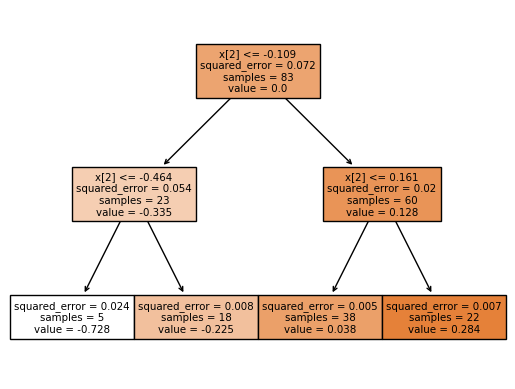

In [41]:
tree.plot_tree(dtc1, filled=True)

In [34]:
df['y_pred1'] = dtc1.predict(X)
df

,SAT,GPA,avg,Residual1_error,y_pred1
0,1714,2.40,3.334217,-0.934217,-0.728217
1,1664,2.52,3.334217,-0.814217,-0.728217
2,1760,2.54,3.334217,-0.794217,-0.728217
3,1685,2.74,3.334217,-0.594217,-0.728217
4,1693,2.83,3.334217,-0.504217,-0.728217
...,...,...,...,...,...
79,1936,3.71,3.334217,0.375783,0.283510
80,1810,3.71,3.334217,0.375783,0.283510
81,1987,3.73,3.334217,0.395783,0.283510
82,1962,3.76,3.334217,0.425783,0.283510


In [35]:
learning_rate = 0.01
df['avg2'] = df['avg'] + learning_rate* df['y_pred1']
df

,SAT,GPA,avg,Residual1_error,y_pred1,avg2
0,1714,2.40,3.334217,-0.934217,-0.728217,3.326935
1,1664,2.52,3.334217,-0.814217,-0.728217,3.326935
2,1760,2.54,3.334217,-0.794217,-0.728217,3.326935
3,1685,2.74,3.334217,-0.594217,-0.728217,3.326935
4,1693,2.83,3.334217,-0.504217,-0.728217,3.326935
...,...,...,...,...,...,...
79,1936,3.71,3.334217,0.375783,0.283510,3.337052
80,1810,3.71,3.334217,0.375783,0.283510,3.337052
81,1987,3.73,3.334217,0.395783,0.283510,3.337052
82,1962,3.76,3.334217,0.425783,0.283510,3.337052


In [36]:
df['Residual2_error'] = df['GPA'] - df['avg2']
df

,SAT,GPA,avg,Residual1_error,y_pred1,avg2,Residual2_error
0,1714,2.40,3.334217,-0.934217,-0.728217,3.326935,-0.926935
1,1664,2.52,3.334217,-0.814217,-0.728217,3.326935,-0.806935
2,1760,2.54,3.334217,-0.794217,-0.728217,3.326935,-0.786935
3,1685,2.74,3.334217,-0.594217,-0.728217,3.326935,-0.586935
4,1693,2.83,3.334217,-0.504217,-0.728217,3.326935,-0.496935
...,...,...,...,...,...,...,...
79,1936,3.71,3.334217,0.375783,0.283510,3.337052,0.372948
80,1810,3.71,3.334217,0.375783,0.283510,3.337052,0.372948
81,1987,3.73,3.334217,0.395783,0.283510,3.337052,0.392948
82,1962,3.76,3.334217,0.425783,0.283510,3.337052,0.422948


In [37]:
dtc2 = DecisionTreeRegressor(max_depth=2)
dtc2.fit(X, df['Residual2_error'])

DecisionTreeRegressor(max_depth=2)

In [38]:
df['y_pred2'] = dtc2.predict(X)
df

,SAT,GPA,avg,Residual1_error,y_pred1,avg2,Residual2_error,y_pred2
0,1714,2.40,3.334217,-0.934217,-0.728217,3.326935,-0.926935,-0.720935
1,1664,2.52,3.334217,-0.814217,-0.728217,3.326935,-0.806935,-0.720935
2,1760,2.54,3.334217,-0.794217,-0.728217,3.326935,-0.786935,-0.720935
3,1685,2.74,3.334217,-0.594217,-0.728217,3.326935,-0.586935,-0.720935
4,1693,2.83,3.334217,-0.504217,-0.728217,3.326935,-0.496935,-0.720935
...,...,...,...,...,...,...,...,...
79,1936,3.71,3.334217,0.375783,0.283510,3.337052,0.372948,0.270236
80,1810,3.71,3.334217,0.375783,0.283510,3.337052,0.372948,0.270236
81,1987,3.73,3.334217,0.395783,0.283510,3.337052,0.392948,0.270236
82,1962,3.76,3.334217,0.425783,0.283510,3.337052,0.422948,0.270236


In [39]:
learning_rate = 0.01
df['avg3'] = df['avg'] + learning_rate* df['y_pred2']
df

,SAT,GPA,avg,Residual1_error,y_pred1,avg2,Residual2_error,y_pred2,avg3
0,1714,2.40,3.334217,-0.934217,-0.728217,3.326935,-0.926935,-0.720935,3.327008
1,1664,2.52,3.334217,-0.814217,-0.728217,3.326935,-0.806935,-0.720935,3.327008
2,1760,2.54,3.334217,-0.794217,-0.728217,3.326935,-0.786935,-0.720935,3.327008
3,1685,2.74,3.334217,-0.594217,-0.728217,3.326935,-0.586935,-0.720935,3.327008
4,1693,2.83,3.334217,-0.504217,-0.728217,3.326935,-0.496935,-0.720935,3.327008
...,...,...,...,...,...,...,...,...,...
79,1936,3.71,3.334217,0.375783,0.283510,3.337052,0.372948,0.270236,3.336919
80,1810,3.71,3.334217,0.375783,0.283510,3.337052,0.372948,0.270236,3.336919
81,1987,3.73,3.334217,0.395783,0.283510,3.337052,0.392948,0.270236,3.336919
82,1962,3.76,3.334217,0.425783,0.283510,3.337052,0.422948,0.270236,3.336919


In [40]:
df['Residual3_error'] = df['GPA'] - df['avg3']
df

,SAT,GPA,avg,Residual1_error,y_pred1,avg2,Residual2_error,y_pred2,avg3,Residual3_error
0,1714,2.40,3.334217,-0.934217,-0.728217,3.326935,-0.926935,-0.720935,3.327008,-0.927008
1,1664,2.52,3.334217,-0.814217,-0.728217,3.326935,-0.806935,-0.720935,3.327008,-0.807008
2,1760,2.54,3.334217,-0.794217,-0.728217,3.326935,-0.786935,-0.720935,3.327008,-0.787008
3,1685,2.74,3.334217,-0.594217,-0.728217,3.326935,-0.586935,-0.720935,3.327008,-0.587008
4,1693,2.83,3.334217,-0.504217,-0.728217,3.326935,-0.496935,-0.720935,3.327008,-0.497008
...,...,...,...,...,...,...,...,...,...,...
79,1936,3.71,3.334217,0.375783,0.283510,3.337052,0.372948,0.270236,3.336919,0.373081
80,1810,3.71,3.334217,0.375783,0.283510,3.337052,0.372948,0.270236,3.336919,0.373081
81,1987,3.73,3.334217,0.395783,0.283510,3.337052,0.392948,0.270236,3.336919,0.393081
82,1962,3.76,3.334217,0.425783,0.283510,3.337052,0.422948,0.270236,3.336919,0.423081
